In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gaussian, threshold_otsu, threshold_multiotsu
from skimage.restoration import denoise_nl_means,estimate_sigma
import scipy.ndimage as ndi
import cv2
from time import time
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['black', 'white'])

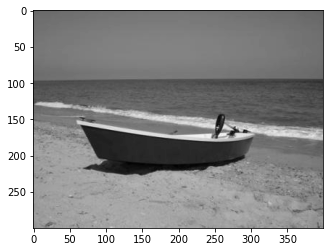

In [2]:
I = cv2.imread('bote.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(I,cmap='gray')

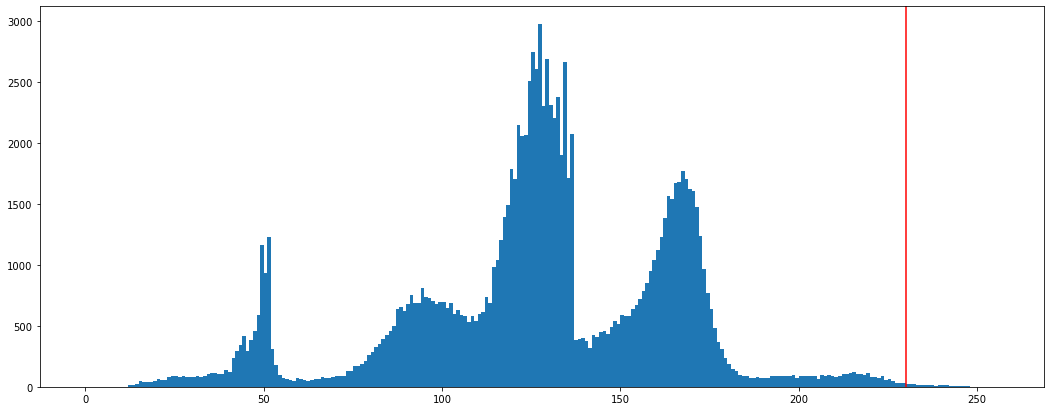

In [3]:
fig1=plt.figure(figsize = (18,7))
plt.hist(I.ravel(),256,[0,256]); 
plt.axvline(x=230,color='r')
plt.show()

Text(0.5, 1.0, 'Segmentation')

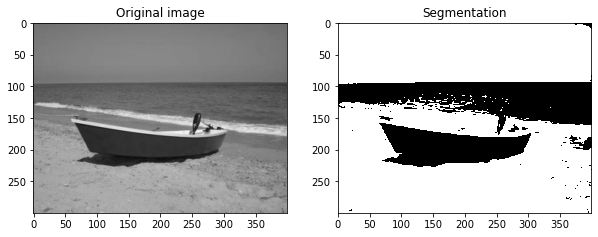

In [4]:
nf,nc=I.shape
Is=I.copy()*0
Is[I>=110]=1
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(I, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original image')

ax[1].imshow(Is, cmap=cmap)
ax[1].set_title('Segmentation')

Text(0.5, 1.0, 'Segmentation')

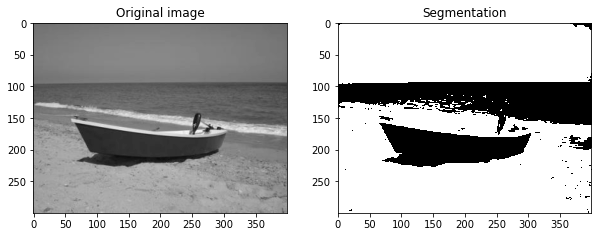

In [5]:
umbral=threshold_otsu(I)
bw=I.copy()*0
bw[I>=umbral]=1
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(I, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original image')

ax[1].imshow(bw, cmap=cmap)
ax[1].set_title('Segmentation')

Text(0.5, 1.0, 'Segmentation')

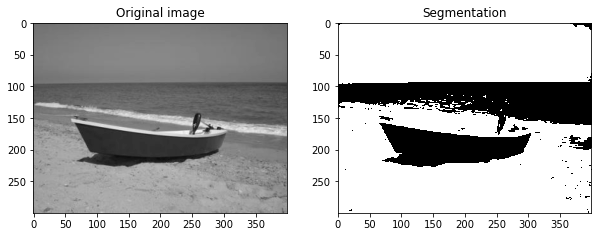

In [6]:
umbral=threshold_otsu(I)
bw=I.copy()*0
bw[I>=umbral]=255
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(I, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original image')

ax[1].imshow(bw, cmap=cmap,vmin=0,vmax=255)
ax[1].set_title('Segmentation')

Text(0.5, 1.0, 'Segmentation')

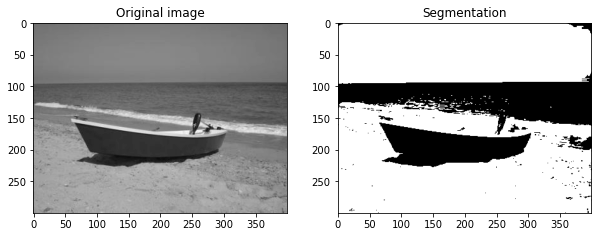

In [7]:
# T, thresh = cv2.threshold(I, 200, 255, cv2.THRESH_BINARY_INV)
T, thresh = cv2.threshold(I, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(I, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original image')

ax[1].imshow(thresh, cmap='binary',vmin=0,vmax=255)
ax[1].set_title('Segmentation')

Text(0.5, 1.0, 'Segmentation')

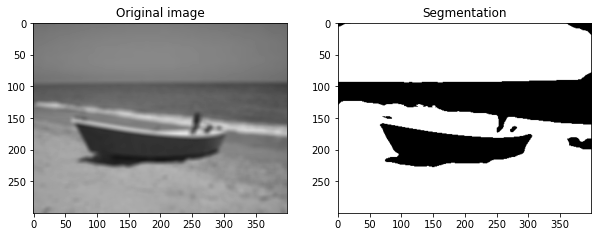

In [8]:
In= cv2.GaussianBlur(I,(9,9),cv2.BORDER_DEFAULT)
In=In.astype(np.uint8)
T, thresh = cv2.threshold(In, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(In, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original image')

ax[1].imshow(thresh, cmap='binary',vmin=0,vmax=255)
ax[1].set_title('Segmentation')

In [9]:
thresholds = threshold_multiotsu(I,classes=6)
print(thresholds)
Is = np.digitize(I, bins=thresholds)

[ 68 105 126 149 187]


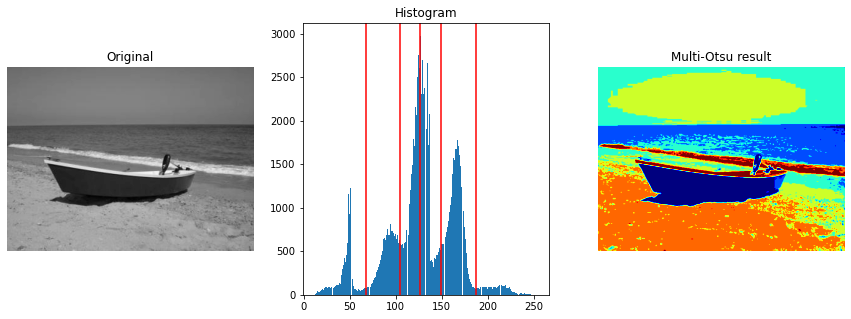

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plotting the original image.
ax[0].imshow(I, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(I.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(Is, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

In [11]:
%matplotlib qt
plt.imshow(Is, cmap='jet')